In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow_hub as hub

LOADING MODEL

In [11]:
model = tf.keras.models.load_model("F:\\.FINAL YEAR PROJECT\\LFR EFFICIENTNET.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [24]:
BATCH_SIZE = 100
IMAGE_SIZE = 224
CHANNELS=3


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "F:\\.FINAL YEAR PROJECT\\split Final dataset\\test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2360 files belonging to 17 classes.


In [25]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [10]:
scores = model.evaluate(dataset)

236/236 [==============================] - 118s 459ms/step - loss: 0.2193 - accuracy: 0.9314


In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    return predicted_class, confidence

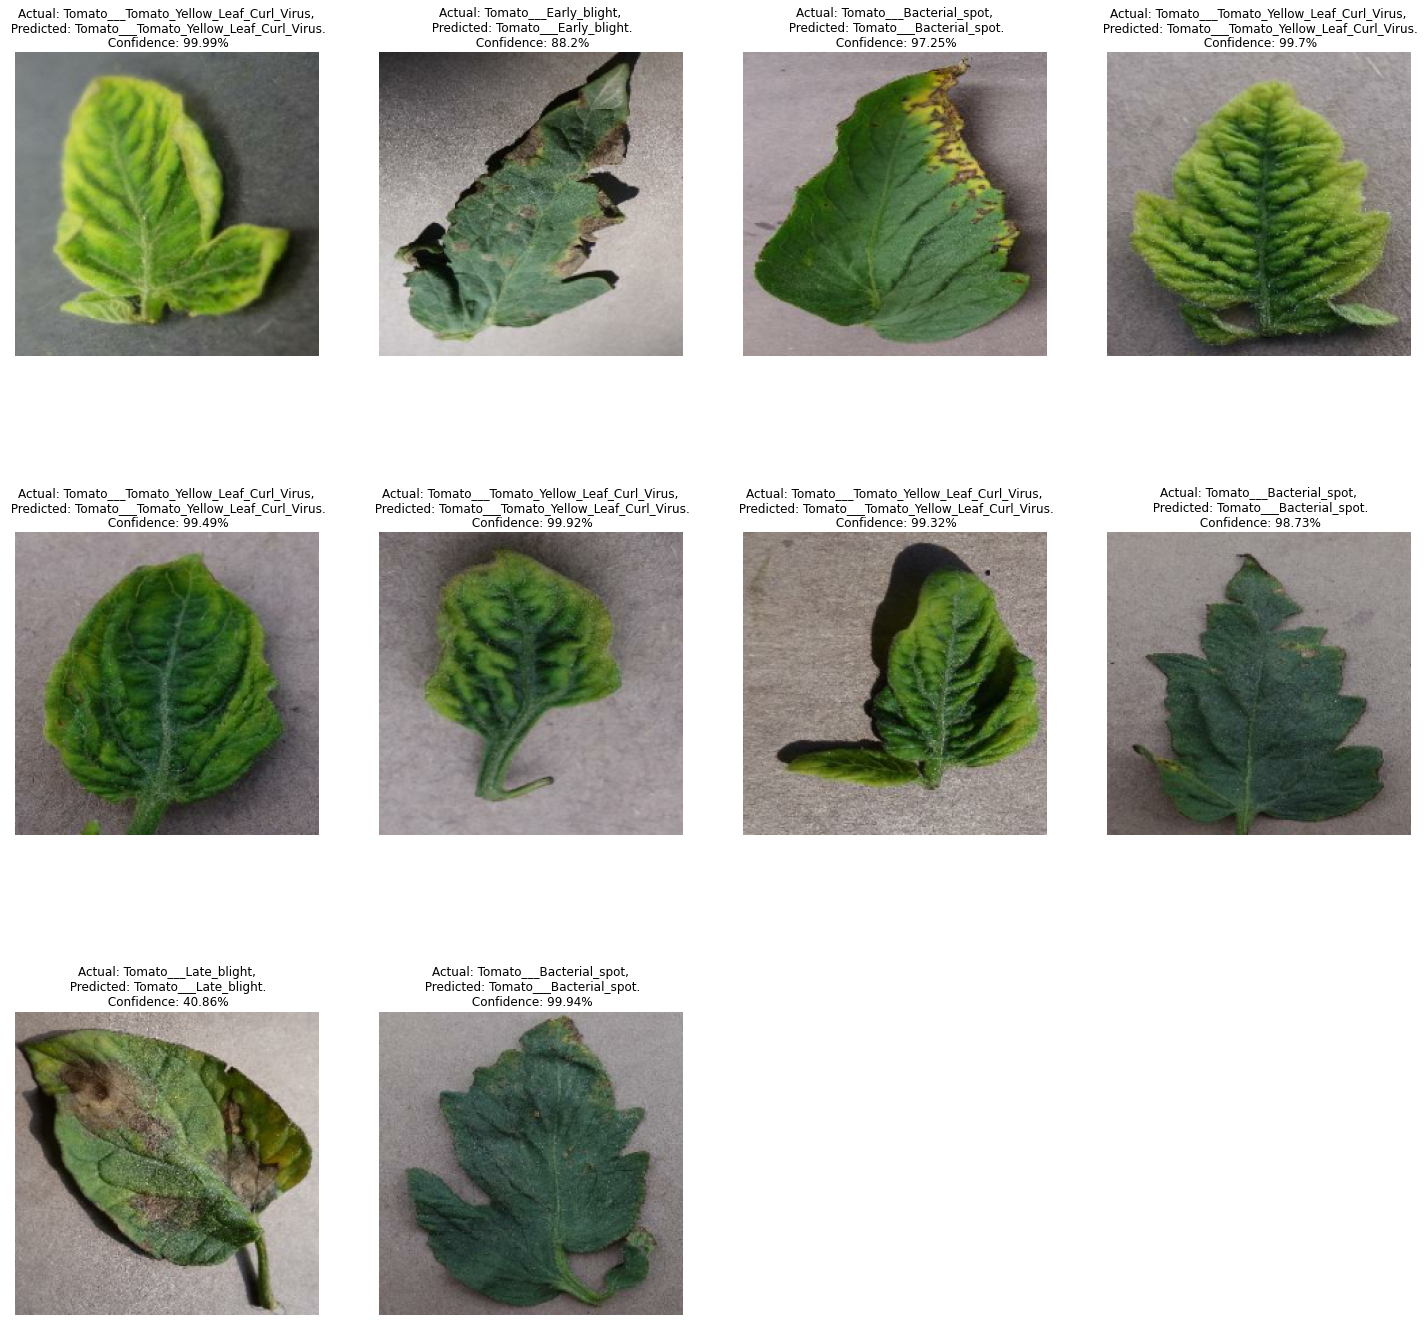

In [20]:
import numpy as np
plt.figure(figsize=(25,25))
for images, labels in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3,4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i] ]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [34]:
import numpy as np
Total=0
CorrectPredicted=0
WrongPredicted=0
for images, labels in dataset.take(1):
    for i in range(100):
        Total+=1
        predicted, confidence = predict(model, images[i].numpy())
        actual = class_names[labels[i] ]
        if actual == predicted:
            CorrectPredicted+=1
        else:
            WrongPredicted+=1

print("Total: ",Total)

print("Accuracy: ",(CorrectPredicted/Total))

print("Error: ",(WrongPredicted/Total))



Total:  100
Accuracy:  0.94
Error:  0.06
